# Lab \#4 : Recursion
***
- 작성자 : B88047윤준호
- 작성일 : 2022 / 10 / 11, tue
***

## Python Tutor 사용을 default 로 함. 자기 호출 횟수 카운트하기 위해서 global 변수 사용.

### Q1. num_es.py  파일을 수행해 본 후에 1: (n-1) 분활이 아닌 n/2: n/2 로 분할하는 버젼으로 바꾸어 테스트한  python tutor 결과 첨부. 원래 버젼과 비교하여 자기 호출의 수에 차이가 있는가?

A : 분할 수에 차이가 없는것을 볼 수 있다.
   

**원래 버전**

In [1]:
recursive_count = 0

def num_es(s):
    global recursive_count
    recursive_count += 1
    """
    Returns: number of 'e's in s

    Parameter: s the string to count
    Precondition s is a string
    """
    # Work on small data  (BASE CASE)
    if s == '':
        return 0
    elif len(s) == 1:
        return 1 if s[0]=='e' else 0

    # Break up the data   (RECUSIVE CASE)
    left = num_es(s[0])
    right = num_es(s[1:])

    # Combine the results
    return left+right

print(f"'e'count :  {num_es('egg penne')} | recursive_count : {recursive_count}")
recursive_count = 0
print(f"'e'count :  {num_es('apple')} | recursive_count : {recursive_count}")
recursive_count = 0
print(f"'e'count :  {num_es('banana')} | recursive_count : {recursive_count}")

'e'count :  3 | recursive_count : 17
'e'count :  1 | recursive_count : 9
'e'count :  0 | recursive_count : 11


**n/2로 분할하는 버전**

In [2]:
recursive_count = 0

def num_es(s):
    global recursive_count
    recursive_count += 1
    """
    Returns: number of 'e's in s

    Parameter: s the string to count
    Precondition s is a string
    """
    # Work on small data  (BASE CASE)
    if s == '':
        return 0
    elif len(s) == 1:
        return 1 if s[0]=='e' else 0

    middle = len(s) // 2
    left = num_es(s[0:middle])
    right = num_es(s[middle:])

    # Combine the results
    return left+right

print(f"'e'count :  {num_es('egg penne')} | recursive_count : {recursive_count}")
recursive_count = 0
print(f"'e'count :  {num_es('apple')} | recursive_count : {recursive_count}")
recursive_count = 0
print(f"'e'count :  {num_es('banana')} | recursive_count : {recursive_count}")

'e'count :  3 | recursive_count : 17
'e'count :  1 | recursive_count : 9
'e'count :  0 | recursive_count : 11


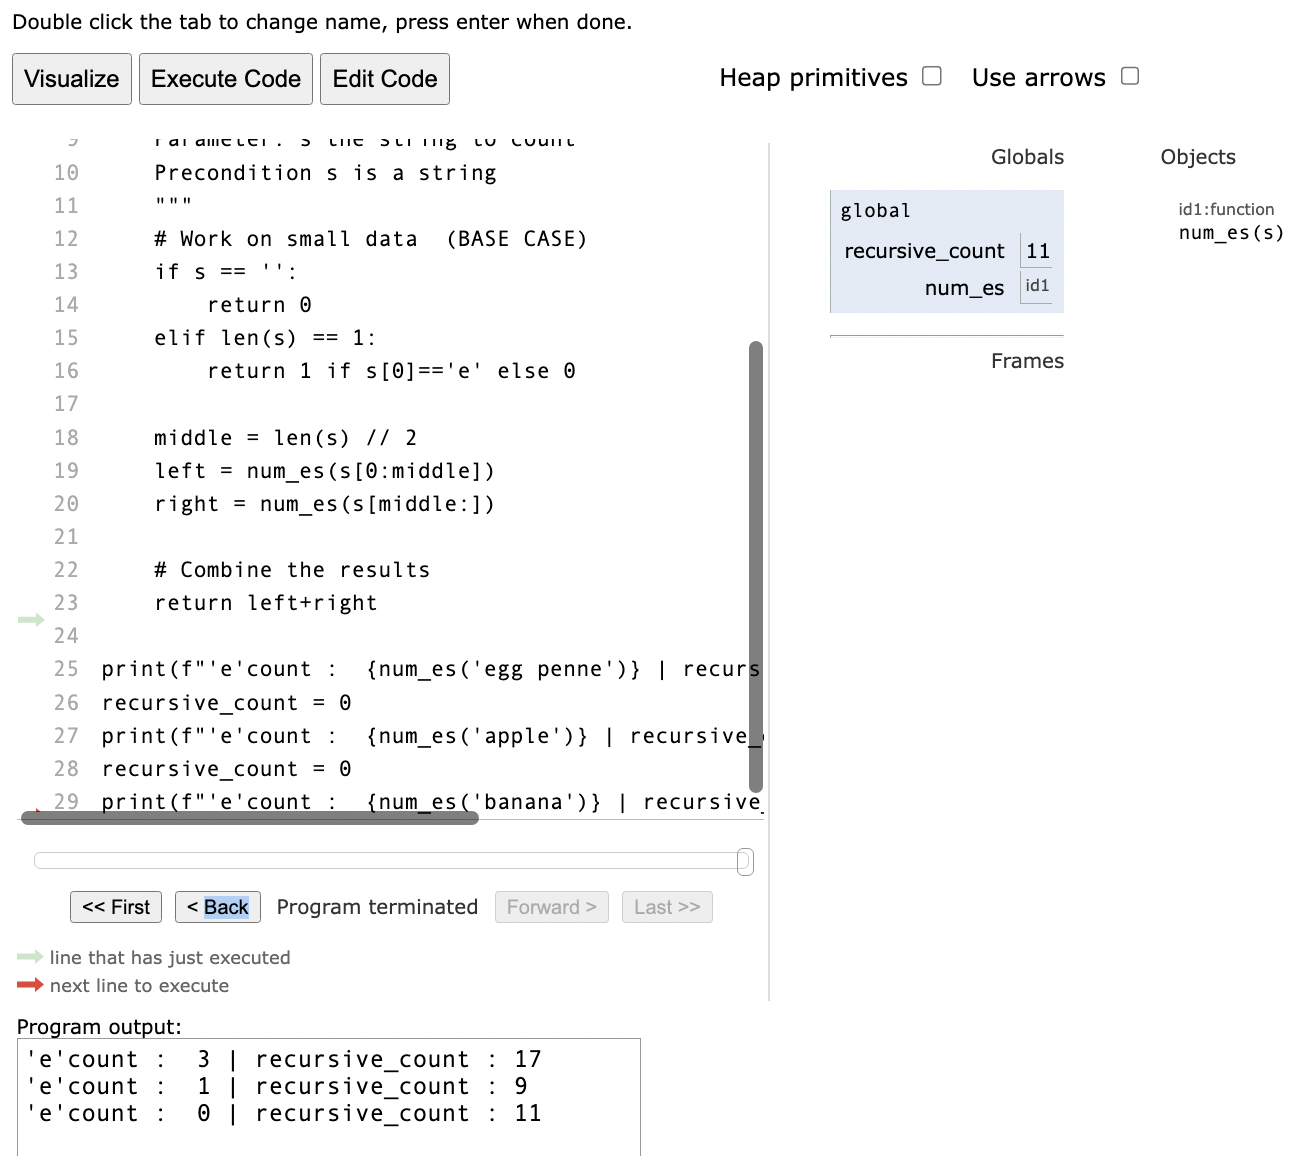

### Q2 : deblack.py 파일 중 최적화된 버젼을 수행해 본 후에 1: (n-1) 분활이 아닌 n/2: n/2 로 분할하는 버젼으로 바꾸어 테스트한  python tutor 결과 첨부.  원래 버젼과 최적화된 버젼 (슬라이드  45) 에서 자기 호출이 일어나는 횟수를 비교하라.

**원래 버전 : 총 7번 호출**

In [3]:
recursion_count = 0
# Function Definition
def deblank(s):
    global recursion_count
    recursion_count += 1
    """
    Returns: s without spaces (all other blanks left alone)

    Parameter s: The string to remove blanks
    Precondition: s is a string.
    """
    if s == '':
        return s
    left = s[0]
    if s[0] == ' ':
        left = ''
    right = deblank(s[1:])
    return left+right

# Function Call
x = deblank(' a b c')
print(f"Result : {x} | Recursion Count : {recursion_count}")

Result : abc | Recursion Count : 7


**n/2로 변경한 버전 : 총 11번 호출**

In [4]:
"""
Recursive function to remove spaces

This function should be copied into the Python Tutor.  That way you can
see how recursion affects the call stack.

Author: Walker M. White, Lillian Lee, Anne Bracy, Daisy Fan
"""
recursion_count = 0
# Function Definition
def deblank(s):
    global recursion_count
    recursion_count += 1
    """
    Returns: s without spaces (all other blanks left alone)

    Parameter s: The string to remove blanks
    Precondition: s is a string.
    """
    if s == '':
        return s
    elif len(s)==1:
        return '' if s[0]==' ' else s

    middle = len(s) // 2
    left = deblank(s[0:middle])
    right = deblank(s[middle:])

    return left+right

# Function Call
x = deblank(' a b c')
print(f"Result : {x} | Recursion Count : {recursion_count}")

Result : abc | Recursion Count : 11


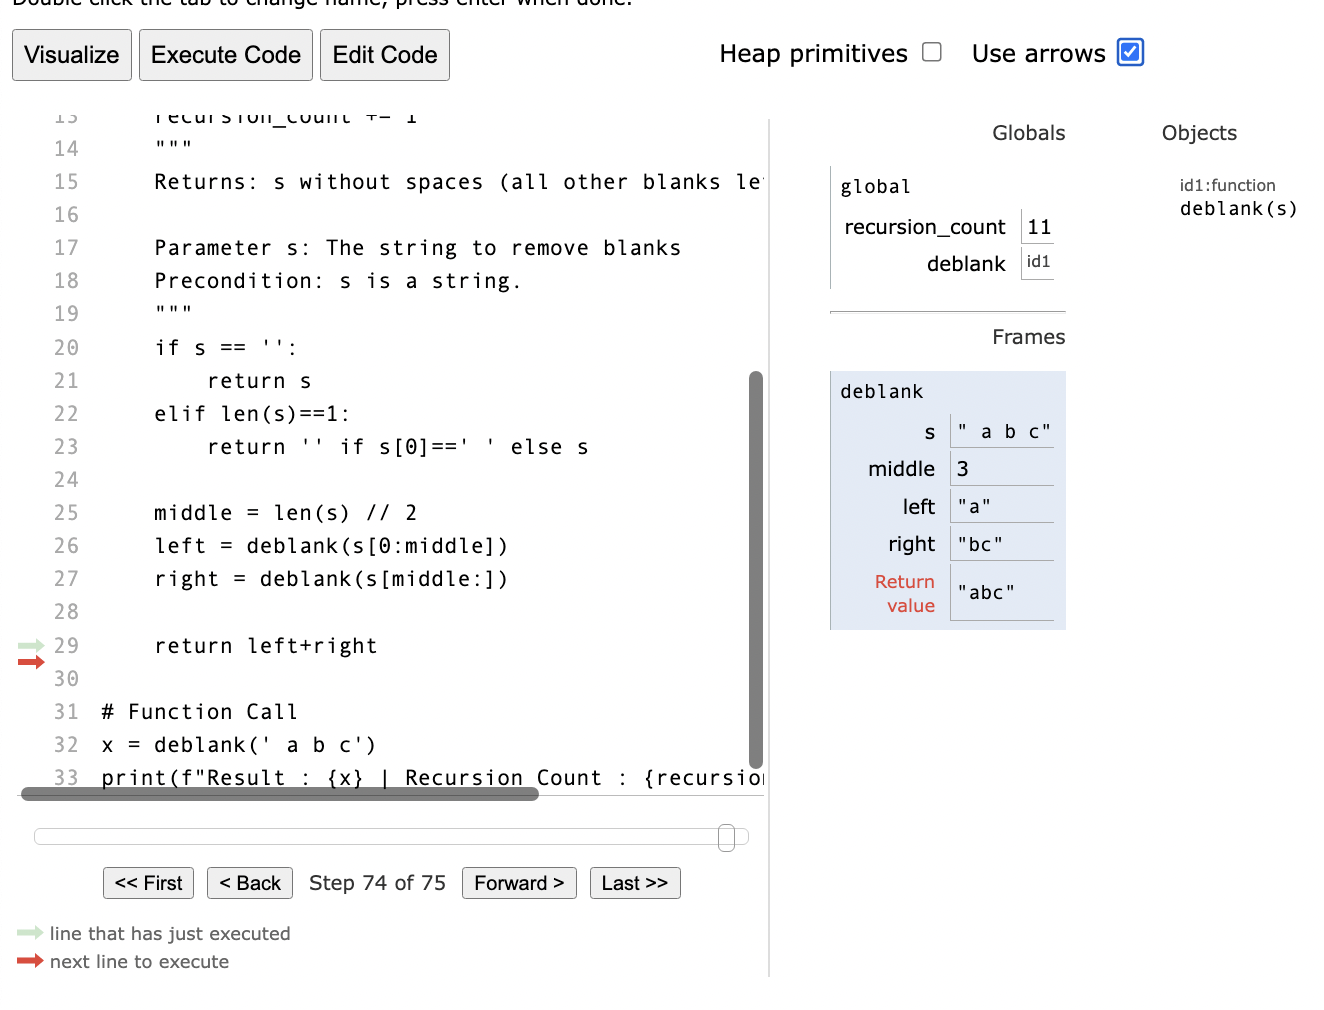

### Q3 : 슬라이드 "Recursion (1)" 에 나오는 Fibonacci 알고리즘을 참고하여  3가지 버젼을 구현하여 테스트한다 . (Base cases: n=0, n=1 을 사용)

   - (1) Iterative version; (2) Recursion version; (3) Memorized version.

   - (2) 와 (3) 의 경우에 Fib(n) 을 한 경우에  자기 호출이 몇 번 일어나는 지를 count 한다.

     5개 이상의 예제를 보인다.

   - (2) 와 (3) 의 경우에 Fib(5) 인 경우 Python Tutor 를 사용하여 call frame stack 을 보여라. 특히 (3) 의 경우에 Dict 값이 어떻게 변경되어 유지 되는 지를 관찰한다.

<br>
<br>

**Recursive Fibonacci**


In [5]:
recursion_count = 0
def recursive_fibonacci(n):
    global recursion_count
    recursion_count += 1
    if n <= 1:
        return 1
    return recursive_fibonacci(n-1) + recursive_fibonacci(n-2)

In [6]:
print(f"Result : {recursive_fibonacci(4)} | Recursion Count : {recursion_count}")

Result : 5 | Recursion Count : 9


**Iterative Version 1**

In [7]:
def iterative_fibonacci(n):
    step_0 = 0
    step_1 = 1
    for i in range(n):
        tmp = step_0 + step_1
        step_0 = step_1
        step_1 = tmp
    return step_1

In [8]:
iterative_fibonacci(4)

5

**Iterative Version2**

In [ ]:
def iterative_fibonacci